In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import os

import data_loader
import mnist_model

In [2]:
# set args
args = {
    'angle': 45,
    'batch_size': 10,
    'lr': 0.001,
    'momentum': 0.5,
    'epoch': 5,
    'cuda': True and torch.cuda.is_available(),
    'log_interval': 100,
    'save_interval': 100
}

In [3]:
# load_data
test_loader = data_loader.get_test_loader(args)
train_loader = data_loader.get_train_loader(args)

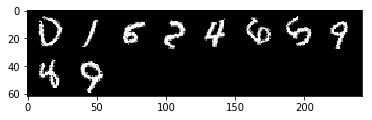

In [4]:
# visaulize data
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = torchvision.utils.make_grid(images)
images = images.numpy()
images = np.transpose(images, (1, 2, 0))
plt.imshow(images)
plt.show()

In [5]:
# load model and optimizer
model = mnist_model.STNClsNet()
if args['cuda']:
    model.cuda()
    
optimizer = optim.SGD(model.parameters(), lr = args['lr'], momentum = args['momentum'])

In [6]:
# train and test
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
        if batch_idx % args['save_interval'] == 0:
            checkpoint_path = checkpoint_dir + 'epoch%03d_iter%03d.pth' % (epoch, batch_idx)
            torch.save(model.cpu().state_dict(), checkpoint_path)
            if args['cuda']:
                model.cuda()

def test(epoch):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile = True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()
        
    test_loss = test_loss
    test_loss /= len(test_loader) # loss function already averages over batch size
    accuracy = 100. * correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.02f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy,
    ))
    log_file.write('{:.02f}\n'.format(accuracy))
    log_file.flush()
    os.fsync(log_file)

In [7]:
checkpoint_dir = 'checkpoint/checkpoint_angle%d/' % (args['angle'])
if not os.path.isdir(checkpoint_dir):
    os.makedirs(checkpoint_dir)
if not os.path.isdir('accuracy_log'):
    os.makedirs('accuracy_log')
log_file_path = 'accuracy_angle%d.txt' % (args['angle'])

In [8]:
with open(log_file_path, 'w') as log_file:
    for epoch in range(1, args['epoch'] + 1):
        train(epoch)
        test(epoch)

/home/stevetod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.340789
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.329387
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.328276
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.301127
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.320890
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.361444
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.324137
Train Epoch: 1 [7000/60000 (12%)]	Loss: 2.320273
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.294385
Train Epoch: 1 [9000/60000 (15%)]	Loss: 2.270046
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.295078
Train Epoch: 1 [11000/60000 (18%)]	Loss: 2.262010
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.321185
Train Epoch: 1 [13000/60000 (22%)]	Loss: 2.347397
Train Epoch: 1 [14000/60000 (23%)]	Loss: 2.294215
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.320148
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.297239
Train Epoch: 1 [17000/60000 (28%)]	Loss: 2.284126
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.263917
Train Epoch: 1 [19000/60000 (32%)]	Loss: 2.286365
Train Epoch: 1 [200

/home/stevetod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/stevetod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.9765, Accuracy: 7209/10000 (72.00%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.183476
Train Epoch: 2 [1000/60000 (2%)]	Loss: 0.930443
Train Epoch: 2 [2000/60000 (3%)]	Loss: 1.100381
Train Epoch: 2 [3000/60000 (5%)]	Loss: 1.204724
Train Epoch: 2 [4000/60000 (7%)]	Loss: 1.196025
Train Epoch: 2 [5000/60000 (8%)]	Loss: 1.281370
Train Epoch: 2 [6000/60000 (10%)]	Loss: 1.711330
Train Epoch: 2 [7000/60000 (12%)]	Loss: 1.303423
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.937038
Train Epoch: 2 [9000/60000 (15%)]	Loss: 1.087808
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.750877
Train Epoch: 2 [11000/60000 (18%)]	Loss: 0.825770
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.678242
Train Epoch: 2 [13000/60000 (22%)]	Loss: 0.938955
Train Epoch: 2 [14000/60000 (23%)]	Loss: 0.593335
Train Epoch: 2 [15000/60000 (25%)]	Loss: 1.067656
Train Epoch: 2 [16000/60000 (27%)]	Loss: 1.321131
Train Epoch: 2 [17000/60000 (28%)]	Loss: 1.826417
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.814323
Train

Train Epoch: 4 [42000/60000 (70%)]	Loss: 0.323116
Train Epoch: 4 [43000/60000 (72%)]	Loss: 1.524661
Train Epoch: 4 [44000/60000 (73%)]	Loss: 0.378628
Train Epoch: 4 [45000/60000 (75%)]	Loss: 0.479157
Train Epoch: 4 [46000/60000 (77%)]	Loss: 0.465732
Train Epoch: 4 [47000/60000 (78%)]	Loss: 1.061455
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.420643
Train Epoch: 4 [49000/60000 (82%)]	Loss: 0.381567
Train Epoch: 4 [50000/60000 (83%)]	Loss: 0.766048
Train Epoch: 4 [51000/60000 (85%)]	Loss: 0.382418
Train Epoch: 4 [52000/60000 (87%)]	Loss: 0.290539
Train Epoch: 4 [53000/60000 (88%)]	Loss: 0.114271
Train Epoch: 4 [54000/60000 (90%)]	Loss: 0.701943
Train Epoch: 4 [55000/60000 (92%)]	Loss: 0.446592
Train Epoch: 4 [56000/60000 (93%)]	Loss: 0.104717
Train Epoch: 4 [57000/60000 (95%)]	Loss: 0.117543
Train Epoch: 4 [58000/60000 (97%)]	Loss: 0.388227
Train Epoch: 4 [59000/60000 (98%)]	Loss: 0.733913

Test set: Average loss: 0.2409, Accuracy: 9259/10000 (92.00%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 

In [14]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
data = images.cuda()
data = Variable(data)
model.eval()
theta = model.loc_net(data)
grid = model.rotate(theta, data.size())
transformed_data = F.grid_sample(data, grid)

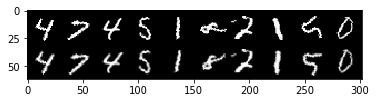

In [15]:
image_show = torch.cat([images, transformed_data.cpu()], dim=0)
images = torchvision.utils.make_grid(image_show, nrow=10)
images = images.detach().numpy()
images = np.transpose(images, (1, 2, 0))
plt.imshow(images)
plt.show()

In [16]:
print(theta)

tensor([ 0.0899, -0.1297,  0.1062,  0.0855,  0.1444, -0.5768, -0.0304,  0.3726,
         0.6214, -0.1769], device='cuda:0', grad_fn=<ViewBackward>)
